In [1]:
import sys
import paramiko
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt


from PasswordLac import password as pw
from Archive.SSH_protocols import *
from PDF import *

%load_ext autoreload
%autoreload 2

C:\Users\Max Tost\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Establishing SSH connection and loading mat files

In [25]:
remote_files = list_remote_files()
jetMats = [file for file in remote_files if 'JET' in file and '.mat' in file]
jeth5s = [file for file in remote_files if 'JET' in file and '.h5' in file]
print(50*'-')
print(f'There are {len(jetMats)} .mat files and {len(jeth5s)} .h5 files from the JET Tokamak on the server.')
# print(jetMats[0], jeth5s[0], len(jetMats), len(jeth5s))

SFTP session established (read-only)!
Files in '/Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/':
AUGno26227.mat
AUGno26228.mat
AUGno26346.mat
AUGno26592.mat
AUGno26694.mat
AUGno26901.mat
AUGno26902.mat
AUGno27677.mat
AUGno28137.mat
AUGno28138.mat
AUGno28140.mat
AUGno28330.mat
AUGno28331.mat
AUGno28726.mat
AUGno28727.mat
AUGno28728.mat
AUGno28729.mat
AUGno29244.mat
AUGno29245.mat
AUGno29247.mat
AUGno29516.mat
AUGno29621.mat
AUGno29622.mat
AUGno29634.mat
AUGno29663.mat
AUGno29777.mat
AUGno29778.mat
AUGno29809.mat
AUGno29810.mat
AUGno29811.mat
AUGno29812.mat
AUGno29816.mat
AUGno29865.mat
AUGno29866.mat
AUGno29867.mat
AUGno29871.mat
AUGno29964.mat
AUGno29965.mat
AUGno30002.mat
AUGno30003.mat
AUGno30004.mat
AUGno30112.mat
AUGno30117.mat
AUGno30505.mat
AUGno32424.mat
AUGno32447.mat
AUGno32449.mat
AUGno32450.mat
AUGno32464.mat
AUGno32474.mat
AUGno33625.mat
AUGno33626.mat
AUGno33629.mat
AUGno33675.mat
AUGno33676.mat
AUGno33678.mat
AUGno33679.mat
AUGno33680.mat
AUGno33681.mat
AUGno33682.mat
AUGno36098.mat
AU

In [3]:
JETnoXX = load_mat_file('JETno89839.mat', r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project', False)
# JETno81543 = load_mat_file('JETno81543.mat', r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project', False)

SFTP session established (read-only)!
File '/Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno89839.mat' exists on the server.
Download complete. Begin loading the file locally.


C:\Users\Max Tost\anaconda3\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "shot" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\Max Tost\anaconda3\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "objDIS" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


MAT File Contents:
objDIS: <class 'numpy.ndarray'>, Shape: (1, 1)
shot: <class 'numpy.ndarray'>, Shape: (1, 1)
Discharge: <class 'numpy.ndarray'>, Shape: (1, 1)
IN: <class 'numpy.ndarray'>, Shape: (1, 1)
tab_SIG: <class 'numpy.ndarray'>, Shape: (73, 1)
SIG: <class 'numpy.ndarray'>, Shape: (1, 1)
SFTP session closed.


Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)


In [19]:
keys_jet = ['IP', 'WMHD', 'RNT', 'DAI_EDG7'] # Plasma current, Magnetic energy, Neutron count, D alpha Balmer line
[element in JETnoXX['SIG'].dtype.names for element in keys_jet] # JETnoXX['SIG'] contains the measured signals in a structured array (kind of dictionary). The keys are in .dtype.names 

[True, True, True, False]

In [23]:
JETnoXX

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Mon Oct  3 17:45:33 2022',
 '__version__': '1.0',
 '__globals__': [],
 'objDIS': array([[(array([[1]], dtype=uint8), array(['JET'], dtype='<U3'), array(['JET'], dtype='<U3'), array(['on'], dtype='<U2'), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array(['off'], dtype='<U3'), array(['off'], dtype='<U3'), array(['off'], dtype='<U3'), array(['off'], dtype='<U3'), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([], dtype='<U1'), array(['off'], dtype='<U3'), array(['Disruption detected!'], dtype='<U20'), array([], shape=(0, 0), dtype=uint8), array([[3]], dtype=uint8), array([[4]], dtype=uint8), array([[5]], dtype=uint8), array([[6]], dtype=uint8), array([[7]], dty

In [22]:
t_d, WMHD_d = JETnoXX['SIG']['WMHD'][0][0]['time'][0][0], -JETnoXX['SIG']['WMHD'][0][0]['signal'][0][0]

ValueError: no field of name time

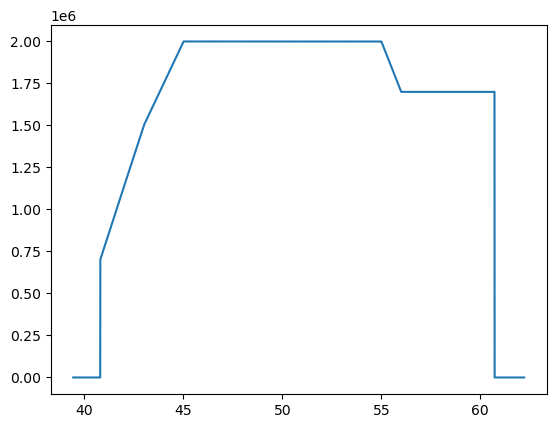

In [8]:
# plt.plot(t, Ip)
plt.plot(t_d, Ip_d)

## Probability Density Function of Plasma Current with and without disruption

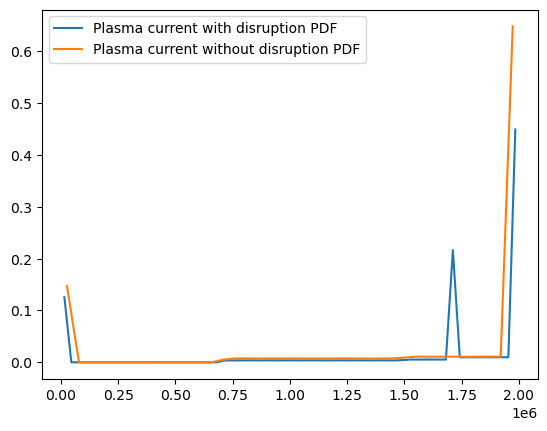

In [12]:
(Ip_d_PDF, Ip_d_bin_centers), scaling = PDF(Ip_d)
plt.plot(Ip_d_bin_centers, Ip_d_PDF, label = 'Plasma current with disruption PDF')
(Ip_PDF, Ip_bin_centers), scaling = PDF(Ip)
plt.plot(Ip_bin_centers, Ip_PDF, label = 'Plasma current without disruption PDF')
plt.legend()
plt.savefig('FIR_Flat_Top PDF.png', dpi=369)